In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random


# NetworkX Clique Generator
 
This notebook demonstrates how to generate and visualize cliques using NetworkX.
A clique is a subset of nodes in an undirected graph where every node is connected to every other node in the subset.

In [2]:
def generate_clique(n):
    """
    Generate a complete clique with n nodes.
    
    Args:
        n (int): Number of nodes in the clique
        
    Returns:
        networkx.Graph: A complete graph representing the clique
    """
    return nx.complete_graph(n)


# Let's create and visualize a simple clique with 5 nodes

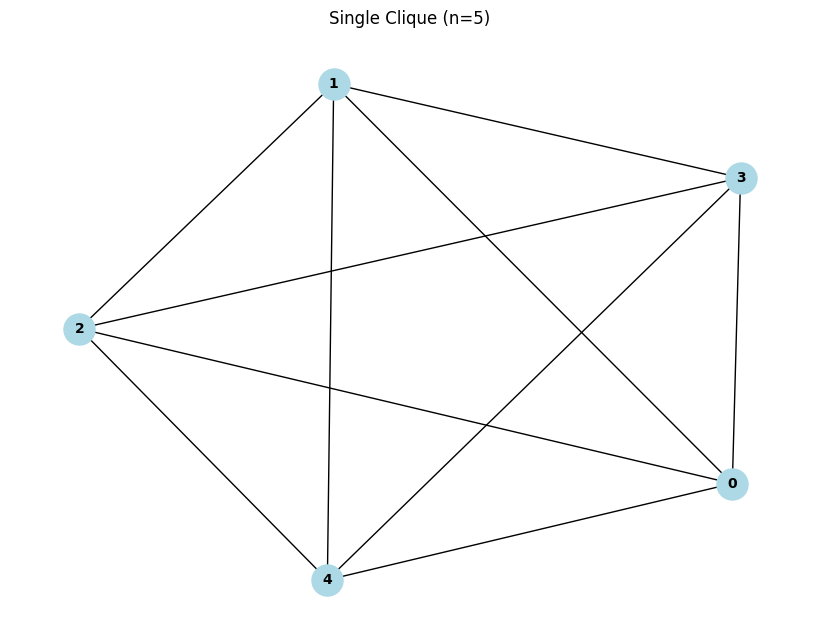

In [3]:
simple_clique = generate_clique(5)

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(simple_clique)
nx.draw(simple_clique, pos, with_labels=True, 
        node_color='lightblue', node_size=500, 
        font_size=10, font_weight='bold')
plt.title("Single Clique (n=5)")
plt.show()

# Now let's create a function to generate multiple cliques and connect them:

In [4]:
def generate_multiple_cliques(sizes, connections=0):
    """
    Generate multiple cliques and optionally connect them.
    
    Args:
        sizes (list): List of integers representing sizes of each clique
        connections (int): Number of random edges to add between cliques
        
    Returns:
        networkx.Graph: A graph containing multiple cliques
    """
    G = nx.Graph()
    offset = 0
    clique_nodes = []
    
    # Generate each clique
    for size in sizes:
        nodes = list(range(offset, offset + size))
        clique_nodes.append(nodes)
        clique = generate_clique(size)
        # Relabel nodes to avoid conflicts
        mapping = {i: i + offset for i in range(size)}
        clique = nx.relabel_nodes(clique, mapping)
        G.add_edges_from(clique.edges())
        offset += size
    
    # Add random connections between cliques
    for _ in range(connections):
        # Select two different cliques
        clique1, clique2 = random.sample(clique_nodes, 2)
        # Select random nodes from each clique
        node1 = random.choice(clique1)
        node2 = random.choice(clique2)
        G.add_edge(node1, node2)
    
    return G

# Let's create a visualization function:

In [5]:
def visualize_graph(G, title="Graph Visualization"):
    """
    Visualize the graph using matplotlib.
    
    Args:
        G (networkx.Graph): Graph to visualize
        title (str): Title for the plot
    """
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', 
            node_size=500, font_size=10, font_weight='bold')
    plt.title(title)
    plt.show()

# Now let's generate and visualize multiple connected cliques:

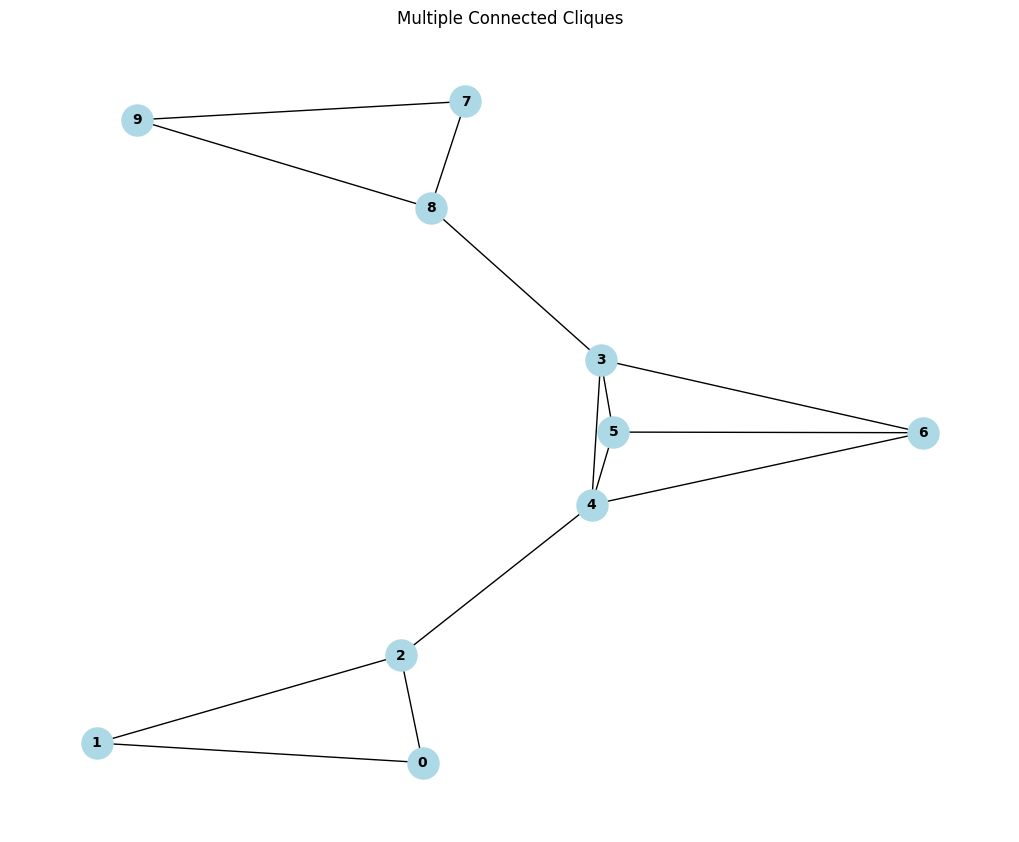

In [6]:
sizes = [3, 4, 3]  # Three cliques of sizes 3, 4, and 3
multi_clique = generate_multiple_cliques(sizes, connections=2)
visualize_graph(multi_clique, "Multiple Connected Cliques")


# Let's analyze some properties of our generated graph:

In [7]:
print(f"Number of nodes: {multi_clique.number_of_nodes()}")
print(f"Number of edges: {multi_clique.number_of_edges()}")
print("\nCliques in graph:")
for i, clique in enumerate(nx.find_cliques(multi_clique), 1):
    print(f"Clique {i}: {clique}")

Number of nodes: 10
Number of edges: 14

Cliques in graph:
Clique 1: [0, 1, 2]
Clique 2: [2, 4]
Clique 3: [3, 8]
Clique 4: [3, 4, 5, 6]
Clique 5: [7, 8, 9]


# Interactive Example
Try modifying these parameters to generate different clique configurations:

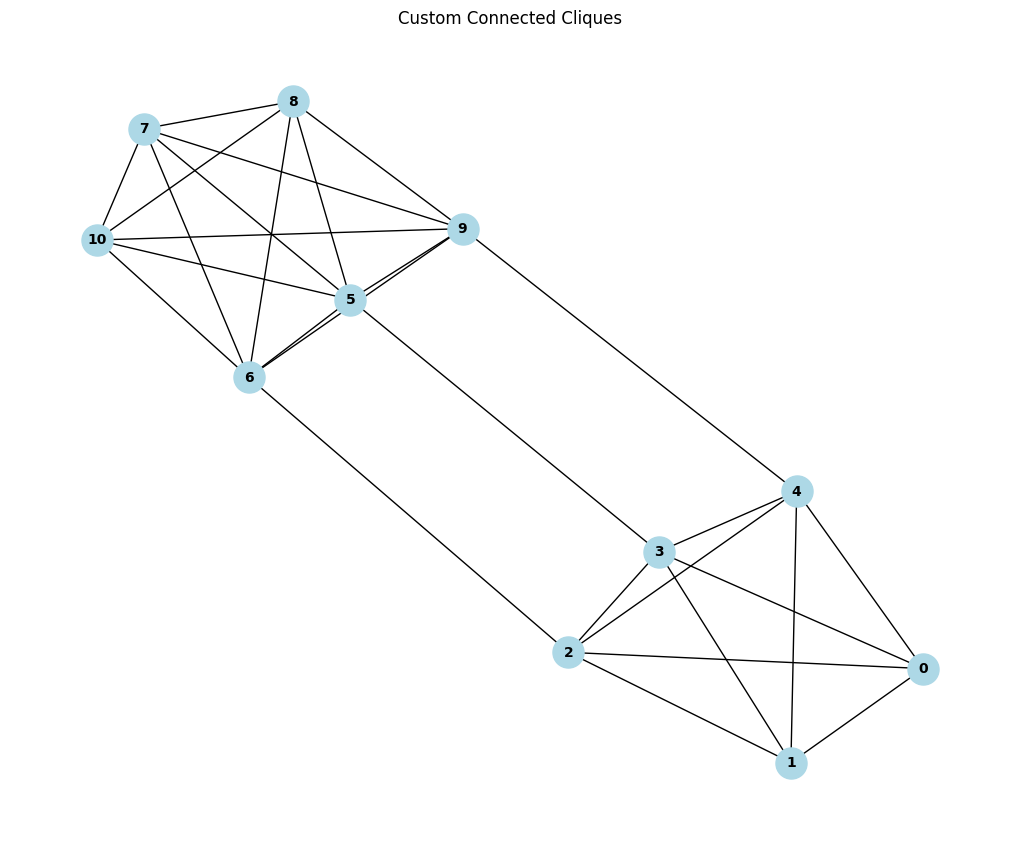

In [8]:
# Example: Generate two larger cliques with more connections
custom_sizes = [5, 6]  # Two cliques of size 5 and 6
custom_connections = 3  # Number of random connections between cliques

custom_graph = generate_multiple_cliques(custom_sizes, custom_connections)
visualize_graph(custom_graph, "Custom Connected Cliques")